In [2]:
!pip install gradio
!pip install -q gradio ultralytics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Step 2: Load the YOLOv8 model
from ultralytics import YOLO

# Specify the path to your model
model_path = "/content/drive/MyDrive/OCR_Using_model/Yolo_Dataset/FlipkartGrid-OCR-1/runs/detect/train2/weights/best.pt"  # Update with your actual path
model = YOLO(model_path)

## Without Using Gradio


0: 448x640 1 Label, 170.7ms
Speed: 3.5ms preprocess, 170.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


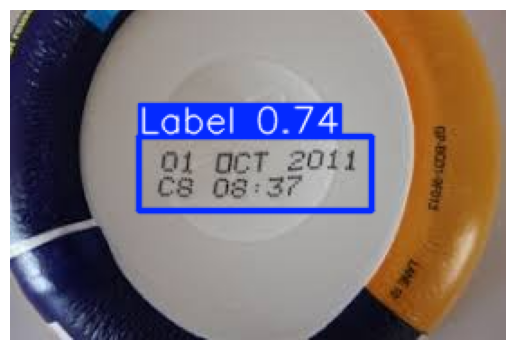

In [11]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLOv8n model (adjust the path to your model file)
model_path = "/content/drive/MyDrive/OCR_Using_model/Yolo_Dataset/FlipkartGrid-OCR-1/runs/detect/train2/weights/best.pt"  # Update with your actual path
model = YOLO(model_path)

# Load an image from your local directory
img_path = "sample_label_11.jpeg"  # Replace with your image path
image = cv2.imread(img_path)

# Run inference on the image
results = model(image)

# Access the first result (assuming there's only one image)
result = results[0]

# Process results (draw bounding boxes, etc.)
result_image = result.plot()  # This generates an image with detections

# Convert BGR to RGB for display
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the result using Matplotlib
plt.imshow(result_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


## Using Gradio For Running

In [18]:
import gradio as gr
from ultralytics import YOLO
import cv2
import numpy as np
def process_image(image):
    # Convert the input image from PIL to OpenCV format
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Run inference on the image
    results = model(image)
    # print("DEBUG: ", results)
    # Check if results are in a list and take the first element if so
    if isinstance(results, list):
        results = results[0]  # Get the first result if it's a list
    result_image = results.plot()
    # Convert back to RGB format for Gradio
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    return result_image

# Create the Gradio interface for image input
iface = gr.Interface(fn=process_image,
                     inputs="image",
                     outputs="image",
                     title="YOLOv8n Object Detection",
                     description="Upload an image to detect objects using the YOLOv8n model.")

# Launch the interface
iface.launch(share=True, debug=True)  # Set share=True for a public link

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cf192d6b9378ca8622.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 448x640 1 Label, 158.0ms
Speed: 7.1ms preprocess, 158.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 640x128 1 Label, 66.6ms
Speed: 2.0ms preprocess, 66.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 128)

0: 640x128 1 Label, 57.2ms
Speed: 1.7ms preprocess, 57.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 128)

0: 512x640 2 Labels, 187.4ms
Speed: 6.8ms preprocess, 187.4ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)

0: 640x384 1 Label, 140.2ms
Speed: 5.8ms preprocess, 140.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 622, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2016, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1569, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8


0: 640x384 1 Label, 128.9ms
Speed: 5.2ms preprocess, 128.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 512x640 2 Labels, 190.4ms
Speed: 11.0ms preprocess, 190.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7863 <> https://cf192d6b9378ca8622.gradio.live
